In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv(r"C:\Users\USER\Downloads\archive (1)\energy_efficiency_data.csv")
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [44]:
df.shape

(768, 10)

In [45]:
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [48]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


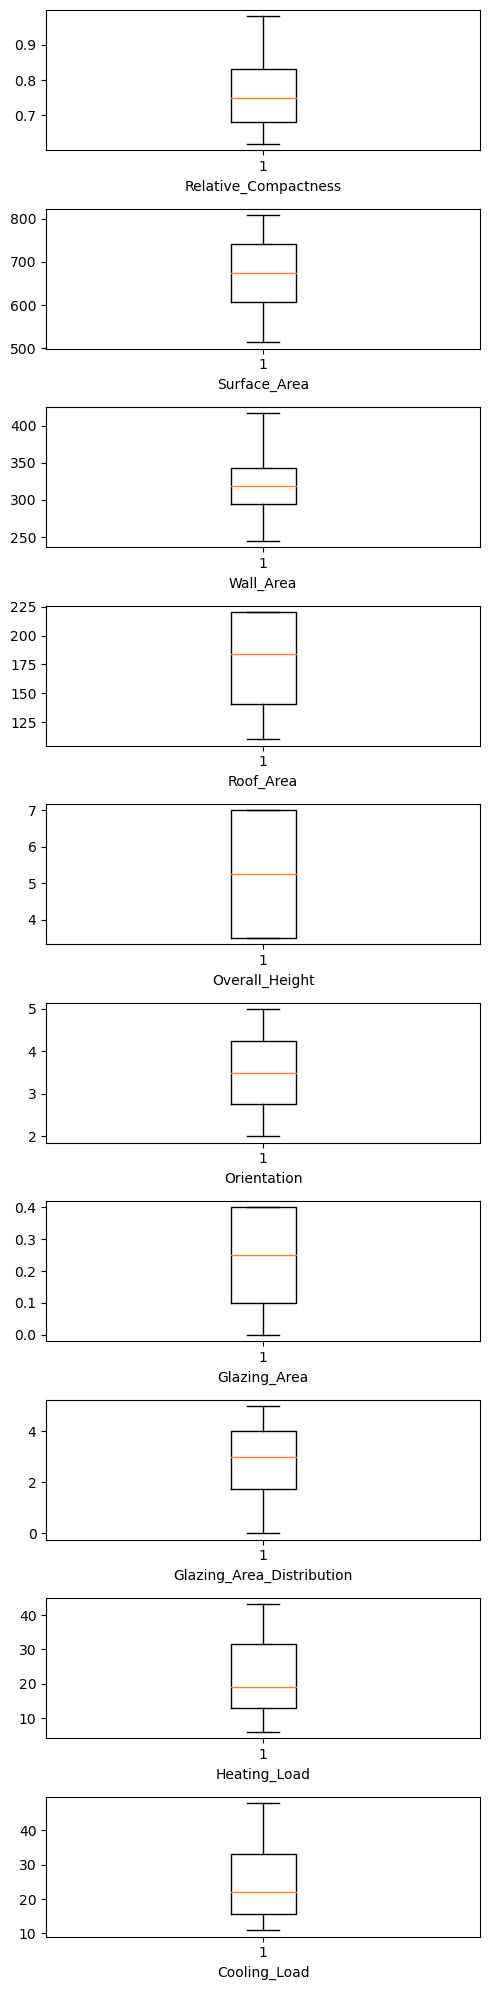

In [50]:
#outliers visualization using boxplot
plt.figure(figsize=(5,20))
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i + 1)
    plt.boxplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

<Axes: >

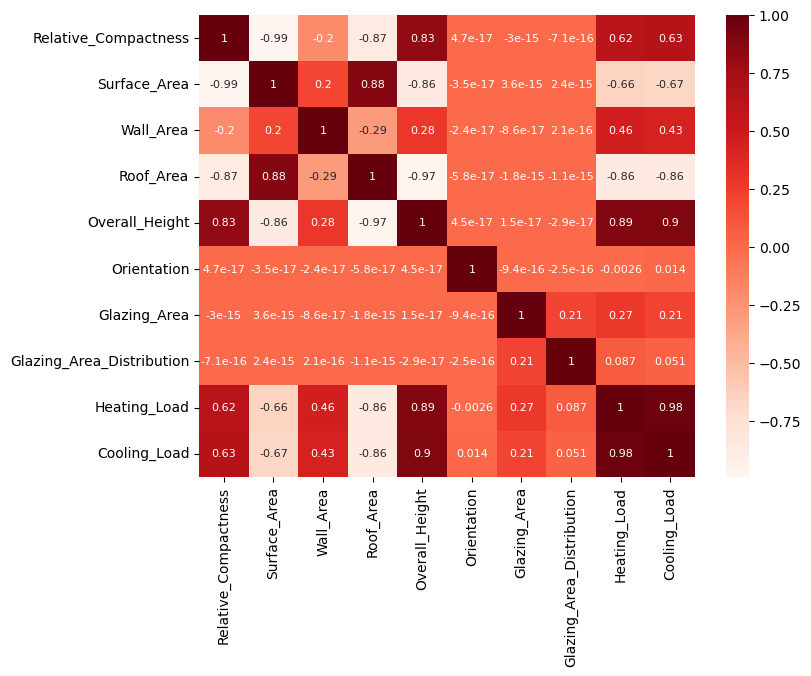

In [51]:
#visualizing the correlation
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot = True,cmap='Reds',annot_kws={"size": 8})

In [52]:
X = df.drop(['Heating_Load','Cooling_Load'], axis = 1)

In [53]:
X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


<Axes: >

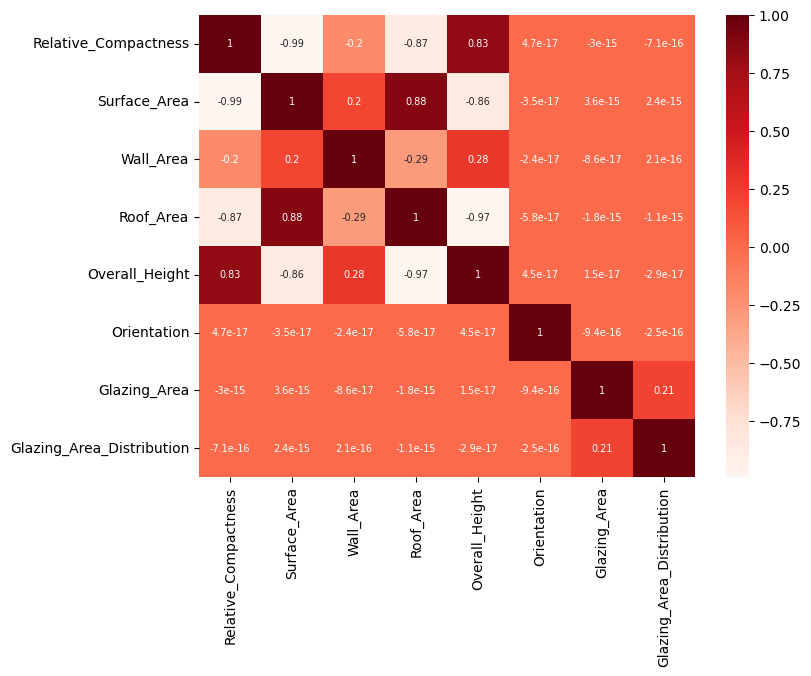

In [54]:
cor = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,cmap = 'Reds', annot = True, annot_kws = {"size":7})

In [55]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Variable           VIF
0                      const  3.231389e+04
1       Relative_Compactness  1.055241e+02
2               Surface_Area           inf
3                  Wall_Area           inf
4                  Roof_Area           inf
5             Overall_Height  3.120547e+01
6                Orientation  1.000000e+00
7               Glazing_Area  1.047508e+00
8  Glazing_Area_Distribution  1.047508e+00


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [56]:
# Assuming 'df' is your DataFrame
X = X.drop(['Wall_Area'], axis=1)

In [57]:
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Variable           VIF
0                      const  32313.888720
1       Relative_Compactness    105.524054
2               Surface_Area    112.774196
3                  Roof_Area     32.124528
4             Overall_Height     31.205474
5                Orientation      1.000000
6               Glazing_Area      1.047508
7  Glazing_Area_Distribution      1.047508


In [58]:
X = X.drop(["Relative_Compactness"], axis = 1)

In [59]:
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Variable         VIF
0                      const  971.415641
1               Surface_Area    4.458639
2                  Roof_Area   21.675038
3             Overall_Height   18.447461
4                Orientation    1.000000
5               Glazing_Area    1.047508
6  Glazing_Area_Distribution    1.047508


In [60]:
X.head()

,const,Surface_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.0,514.5,110.25,7.0,2,0.0,0
1,1.0,514.5,110.25,7.0,3,0.0,0
2,1.0,514.5,110.25,7.0,4,0.0,0
3,1.0,514.5,110.25,7.0,5,0.0,0
4,1.0,563.5,122.50,7.0,2,0.0,0


In [61]:
X = X.drop(['const','Orientation'],axis = 1)

In [62]:
X.head()

,Surface_Area,Roof_Area,Overall_Height,Glazing_Area,Glazing_Area_Distribution
0,514.5,110.25,7.0,0.0,0
1,514.5,110.25,7.0,0.0,0
2,514.5,110.25,7.0,0.0,0
3,514.5,110.25,7.0,0.0,0
4,563.5,122.50,7.0,0.0,0


In [63]:
Y = df[["Heating_Load","Cooling_Load"]]

In [64]:
df["Glazing_Area_Distribution"].value_counts()

1    144
2    144
3    144
4    144
5    144
0     48
Name: Glazing_Area_Distribution, dtype: int64

In [65]:
#scalig the data X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state = 42)

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [68]:
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(x_test)

In [70]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

In [71]:
mse

10.116885368401185

In [72]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

In [73]:
r2

0.8966638499434143

In [74]:
X.columns

Index(['Surface_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area',
       'Glazing_Area_Distribution'],
      dtype='object')

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Surface_Area               768 non-null    float64
 1   Roof_Area                  768 non-null    float64
 2   Overall_Height             768 non-null    float64
 3   Glazing_Area               768 non-null    float64
 4   Glazing_Area_Distribution  768 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


In [76]:
import pickle

In [77]:
with open ('BuildingEnergyModel.pkl','wb') as file:
    pickle.dump(lr,file)

In [78]:
with open('BuildingEnergyModel.pkl', 'rb') as file:
    loaded_lr = pickle.load(file)